In [1]:
import pandas as pd
import time
from datetime import date, datetime
import matplotlib.pyplot as plt
import yfinance as yf
import pickle
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
#run the following command on the terminal: 
#pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib


from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow,Flow
from google.auth.transport.requests import Request

In [3]:
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# here enter the id of your google sheet
SAMPLE_SPREADSHEET_ID_input = '1Th9C5jOsPxDJtGYditB2ZOdCXGi834MSWbPaO9aDxhI'
SAMPLE_RANGE_NAME = 'A1:H1000'

In [5]:
global values_input, service

creds = None
# if os.path.exists('token.pickle'):
#     with open('token.pickle', 'rb') as token:
#         creds = pickle.load(token)
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
            'creds.json', SCOPES) # here enter the name of your downloaded JSON file
        creds = flow.run_local_server(port=0)
    # with open('token.pickle', 'wb') as token:
    #     pickle.dump(creds, token)

service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API
sheet = service.spreadsheets()
result_input = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID_input,
                            range=SAMPLE_RANGE_NAME).execute()
values_input = result_input.get('values', [])

if not values_input and not values_expansion:
    print('No data found.')

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=520015046348-8vikaieamv5kfda2bgq4msn0kmso57s7.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A65167%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fspreadsheets&state=9Li9pMRG3iKe6bpRbP6Xu8Y8o9u4AF&access_type=offline


In [6]:
df = pd.DataFrame(values_input.copy())
df = df.rename(columns = df.iloc[0])
df = df.drop(df.index[0])
df.head()

,Tarih,H/F,Hisse,Alış / Satış,Fiyat,Adet,Tutar,Kurtaj
1,20220101,Fon,AFA,Alış,0.2300,61414,"14,125.22",0.00
2,20220101,Fon,AFT,Alış,0.1600,168361,"26,937.76",0.00
3,20220101,Hisse,ARCLK,Alış,48.4000,90,"4,356.00",2.27
4,20220101,Hisse,ARDYZ,Alış,7.3300,392,"2,873.36",1.49
5,20220101,Hisse,ASELS,Alış,20.8800,415,"8,665.20",4.51


In [7]:
stock_list = list(df.Hisse.unique())
stock_list = [stock for stock in stock_list if len(stock) >= 4]
stock_list.remove('DHER')
stock_list.remove('IST:SISE')
stock_list.append('SISE')
len(stock_list)

28

In [8]:
start_date = '2022-01-01'
end_date = str(pd.Timestamp.today())[:10]
stock_list_is = [stock + '.IS' for stock in stock_list]
stock_list_ult = " ".join(stock_list_is)


In [9]:
price_data = pd.DataFrame(yf.download(stock_list_ult, start_date, end_date)['Close'])
price_data = round(price_data,2).reset_index()

[*********************100%***********************]  28 of 28 completed

1 Failed download:
- GESAN.IS: No data found for this date range, symbol may be delisted


In [10]:
price_data.columns = [stock[:-3] for stock in list(price_data.columns)]
price_data = price_data.rename(columns = {'D':'Date'})
price_data.head()

,Date,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
0,2022-01-03,17.26,49.84,7.41,21.80,64.45,29.86,18.77,1800.0,29.24,251.8,17.27,NaN,4.27,30.26,12.92,34.00,8.08,26.62,13.86,19.09,21.10,82.95,9.92,227.3,166.3,8.06,26.58,11.37
1,2022-01-04,17.71,50.75,7.32,22.50,67.70,30.00,18.60,1855.0,30.22,254.6,17.34,NaN,4.60,30.56,13.18,34.30,8.19,27.73,14.26,19.64,21.78,84.70,10.18,226.5,169.5,8.07,27.06,11.52
2,2022-01-05,17.74,51.70,7.30,23.02,69.30,29.82,18.68,1786.2,30.86,260.9,17.09,NaN,4.54,31.42,13.57,34.20,8.84,27.80,14.41,20.16,22.62,88.80,10.86,228.7,178.9,8.02,26.92,11.60
3,2022-01-06,17.71,51.40,7.14,23.26,68.95,29.32,18.52,1771.6,30.20,258.8,16.57,NaN,4.46,32.08,14.28,35.26,9.38,27.40,14.85,19.70,22.22,87.40,10.77,225.0,186.9,7.92,26.42,11.69
4,2022-01-07,17.96,51.70,7.17,23.46,72.70,29.36,18.17,1775.0,30.62,256.9,18.22,NaN,4.49,32.78,14.19,35.96,9.45,27.60,14.86,19.50,22.50,87.00,10.69,225.0,186.9,8.08,26.54,11.77


In [11]:
stock_list = list(price_data.columns)[1:]

In [19]:
#buraya bedelli ve bedelsizler gelecek...

# data.loc[data.index < '2021-10-25', 'VESBE.IS'] = data.loc[data.index < '2021-10-25', 'VESBE.IS']*(8.4211)
# data.loc[data.index < '2021-08-31', 'GEDZA.IS'] = data.loc[data.index < '2021-08-31', 'GEDZA.IS']*(2)
# data.loc[data.index < '2021-04-30', 'HEKTS.IS'] = data.loc[data.index < '2021-04-30', 'HEKTS.IS']*(2.7577)

yf.Ticker("HEKtS.IS").actions.reset_index()


,Date,Dividends,Stock Splits
0,2002-05-31,0.000000,1.430
1,2003-05-15,0.000000,1.580
2,2005-01-03,0.000000,0.001
3,2007-04-02,0.001281,0.000
4,2008-05-30,0.002138,0.000
5,2008-06-01,0.002138,0.000
6,2009-06-12,0.000000,1.000
7,2010-05-28,0.001325,0.000
8,2011-05-30,0.003166,0.000
9,2012-05-30,0.002899,0.000


In [20]:
trans = df[df.iloc[:,1] == 'Hisse']
# burası düzeltilecek! 
col_list = [col for col in list(trans.columns) if col != 'H/F']
trans = trans[col_list]

trans.columns = ["Date","Stock","Buy/Sell","Price","Lots","Amount","Commission"]
trans = trans.dropna()
trans.reset_index(inplace = True, drop = True)




In [21]:
lots = pd.DataFrame(columns = list(price_data.columns)[1:], index = price_data.Date).reset_index()
lots['Date'] = lots['Date'].astype(str)

In [24]:
trans.Date = trans.Date.str[0:4]+'-'+trans.Date.str[4:6]+'-'+trans.Date.str[6:8]
trans['Amount'] = trans['Amount'].str.replace(',','')
trans['Lots'] = trans['Lots'].astype('float64')
trans['Amount'] = trans['Amount'].astype('float64')
trans['Commission'] = trans['Commission'].astype('float64')
trans.Stock = trans.Stock.replace("IST:SISE","SISE")

In [26]:
for i in range(0,len(lots)):
    for j in range(0,len(stock_list)):
        lots.iloc[i,j+1] = trans[(trans['Date'] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Alış")]["Lots"].sum() \
                        -trans[(trans['Date'] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Satış")]["Lots"].sum()   

                     

In [27]:
expenses = pd.DataFrame(columns = list(price_data.columns)[1:], index = price_data.Date).reset_index()
expenses['Date'] = expenses['Date'].astype(str)

,Date,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
0,2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
#204,20
for i in range(0,len(lots)):
    for j in range(0,len(stock_list)):
        expenses.iloc[i,j+1] = trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Alış")]["Amount"].sum() \
                              -trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "Satış")]["Amount"].sum() \
                              +trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j])]["Commission"].sum() \
                              -trans[(trans["Date"] <= lots.loc[i,'Date']) & (trans["Stock"] == stock_list[j]) & (trans["Buy/Sell"] == "TMTTU")]["Amount"].sum()



In [29]:
lots.set_index('Date', inplace = True)
price_data.set_index('Date', inplace = True)

In [30]:
price_data = price_data.fillna(0)
price_data.head(1)

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,17.26,49.84,7.41,21.8,64.45,29.86,18.77,1800.0,29.24,251.8,17.27,0.0,4.27,30.26,12.92,34.0,8.08,26.62,13.86,19.09,21.1,82.95,9.92,227.3,166.3,8.06,26.58,11.37


In [31]:
lot_pri = pd.DataFrame(price_data.values*lots.values, columns=price_data.columns, index=price_data.index)

In [32]:
expenses[expenses.columns[1:]] = expenses[expenses.columns[1:]].astype('float64')

In [33]:
expenses = expenses.set_index('Date')

In [34]:
profit = pd.DataFrame(lot_pri.values-expenses.values, columns=lot_pri.columns, index=lot_pri.index)
profit["TOTAL"] = profit.sum(axis = 1)
profit["Daily"] = profit["TOTAL"].diff()


In [35]:
price_data.head()

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,17.26,49.84,7.41,21.80,64.45,29.86,18.77,1800.0,29.24,251.8,17.27,0.0,4.27,30.26,12.92,34.00,8.08,26.62,13.86,19.09,21.10,82.95,9.92,227.3,166.3,8.06,26.58,11.37
2022-01-04,17.71,50.75,7.32,22.50,67.70,30.00,18.60,1855.0,30.22,254.6,17.34,0.0,4.60,30.56,13.18,34.30,8.19,27.73,14.26,19.64,21.78,84.70,10.18,226.5,169.5,8.07,27.06,11.52
2022-01-05,17.74,51.70,7.30,23.02,69.30,29.82,18.68,1786.2,30.86,260.9,17.09,0.0,4.54,31.42,13.57,34.20,8.84,27.80,14.41,20.16,22.62,88.80,10.86,228.7,178.9,8.02,26.92,11.60
2022-01-06,17.71,51.40,7.14,23.26,68.95,29.32,18.52,1771.6,30.20,258.8,16.57,0.0,4.46,32.08,14.28,35.26,9.38,27.40,14.85,19.70,22.22,87.40,10.77,225.0,186.9,7.92,26.42,11.69
2022-01-07,17.96,51.70,7.17,23.46,72.70,29.36,18.17,1775.0,30.62,256.9,18.22,0.0,4.49,32.78,14.19,35.96,9.45,27.60,14.86,19.50,22.50,87.00,10.69,225.0,186.9,8.08,26.54,11.77


In [36]:
profit.head(5)

,ALKIM,ARCLK,ARDYZ,ASELS,BIMAS,BRISA,CEMTS,EGEEN,EREGL,FROTO,GEDZA,GESAN,HEKTS,KCHOL,KONTR,KORDS,PETKM,SASA,SISE,TCELL,TKFEN,TOASO,TTKOM,TTRAK,TUPRS,VESBE,VESTL,YATAS,TOTAL,Daily
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-03,0.0,127.33,29.87,377.29,205.8,22.35,0.0,0.0,506.04,271.52,48.26,0.0,-1379.01,188.39,0.0,0.0,82.78,0.0,342.96,21.71,59.46,648.96,185.25,0.0,709.18,60.69,129.79,50.06,2688.68,NaN
2022-01-04,0.0,209.23,-5.41,667.79,420.3,26.55,0.0,0.0,971.54,327.52,57.36,0.0,-1336.11,218.69,0.0,0.0,115.78,0.0,632.96,40.96,107.06,806.46,354.25,0.0,901.18,64.14,170.59,80.81,4831.65,2142.97
2022-01-05,0.0,294.73,-13.25,883.59,525.9,21.15,0.0,0.0,1275.54,453.52,24.86,0.0,-1343.91,305.55,0.0,0.0,310.78,0.0,741.71,59.16,165.86,1175.46,796.25,0.0,1465.18,46.82,158.69,97.21,7444.80,2613.15
2022-01-06,0.0,267.73,-75.97,983.19,502.8,6.15,0.0,0.0,962.04,411.52,-42.74,0.0,-1354.31,372.21,0.0,0.0,472.78,0.0,1060.71,43.06,137.86,1049.46,737.75,0.0,1945.18,11.82,116.19,115.66,7723.09,278.29
2022-01-07,0.0,294.73,-64.21,1066.19,750.3,7.35,0.0,0.0,1161.54,373.52,171.76,0.0,-1350.41,442.91,0.0,0.0,493.78,0.0,1067.96,36.06,157.46,1013.46,685.75,0.0,1945.18,67.82,126.39,132.06,8579.60,856.51


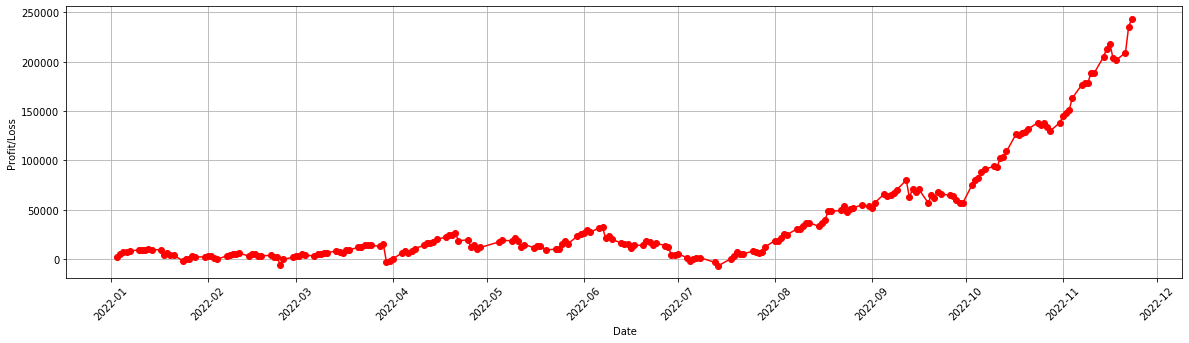

In [37]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20,5))
plt.plot(profit["TOTAL"], linestyle = '-', marker = 'o', color = "red" )
plt.xticks(rotation = 45)
plt.grid()
plt.xlabel("Date") 
plt.ylabel("Profit/Loss")
plt.show()

In [ ]:
## Daily Profits/Losses
df["DAILY"] = df["PORTFOLIO"].diff()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df[df["DAILY"].isnull() == False]["DAILY"].tail())